In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
# csv 파일 불러오기

accidList = pd.read_csv('data/accidentInfoList.csv')
accidList.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,비,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,흐림,교차로 - 교차로안,자전거,남,73세,중상,승용,남,39세,상해없음
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,흐림,교차로 - 교차로안,자전거,여,45세,경상,승용,남,74세,상해없음
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,13세,경상,승합,남,41세,상해없음


In [9]:
# 불러온 csv 파일에 지역구 column을 만들어 지역구 표시하기

accidList['지역구']=accidList['시군구'].str.split(" ").str[1]
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,단일로 - 기타,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [19]:
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로부근', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로안', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로횡단보도내', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 고가도로위', repl='고가도로 / 지하도로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 지하차도(도로)내', repl='고가도로 / 지하도로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 기타', repl='기타 단일로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 터널', repl='터널', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 교량', repl='교량', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='기타 - 기타', repl='기타 / 미분류', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='미분류 - 미분류', repl='기타 / 미분류', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='주차장 - 주차장', repl='주차장', regex=False)

In [20]:
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 / 미분류,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,기타 단일로,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 / 미분류,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,기타 단일로,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [21]:
# 도로형태별 사고건수 확인하기

road = accidList.groupby('도로형태').size()
road

도로형태
고가도로 / 지하도로      16
교량               14
교차로            1237
기타 / 미분류        340
기타 단일로         1513
주차장               5
터널                2
dtype: int64

In [218]:
road_df = road.to_frame()
road_df.columns = ['사고건수']
road_df

,사고건수
도로형태,
고가도로 / 지하도로,16
교량,14
교차로,1237
기타 / 미분류,340
기타 단일로,1513
주차장,5
터널,2


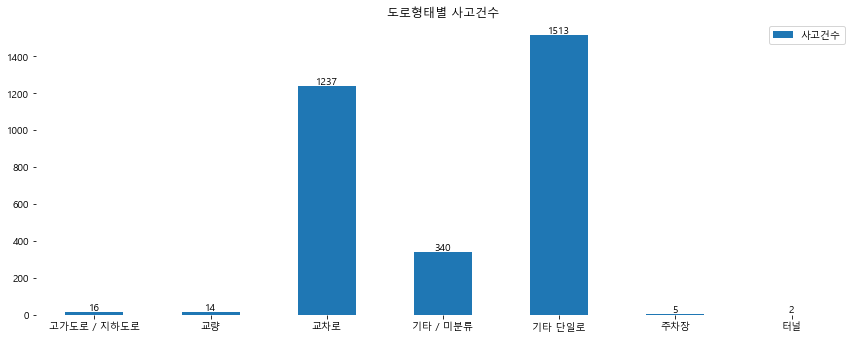

In [219]:
ax = road_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사고건수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height+10), ha='center')
plt.box(False)
plt.xlabel(' ')
plt.tight_layout()
plt.show()

In [46]:
type(road)

pandas.core.series.Series

In [62]:
# 도로형태별 사고건수 전부 더하기

road_total = road.sum()
road_total

3127

In [91]:
# 도로형태별 사고건수 백분율 구하기

road_percent = (accidList.groupby('도로형태').size()/road_total) * 100

In [92]:
# 도로형태별 사고건수 백분율로 변환

road_percent

도로형태
고가도로 / 지하도로     0.511673
교량              0.447713
교차로            39.558682
기타 / 미분류       10.873041
기타 단일로         48.385034
주차장             0.159898
터널              0.063959
dtype: float64

In [93]:
# 도로형태별 사고건수 백분율 데이터 프레임으로 변환

road_percent_df = road_percent.to_frame()

In [94]:
road_percent_df

,0
도로형태,
고가도로 / 지하도로,0.511673
교량,0.447713
교차로,39.558682
기타 / 미분류,10.873041
기타 단일로,48.385034
주차장,0.159898
터널,0.063959


In [95]:
# 도로형태별 사고건수 백분율 데이터 프레임에 '사고건수 백분율' 컬럼명 추가

road_percent_df.columns = ['사고건수 백분율']

In [96]:
road_percent_df

,사고건수 백분율
도로형태,
고가도로 / 지하도로,0.511673
교량,0.447713
교차로,39.558682
기타 / 미분류,10.873041
기타 단일로,48.385034
주차장,0.159898
터널,0.063959


In [99]:
# 도로형태별 사고건수 백분율 데이터 프레임에 '사고건수 백분율' 소수점 첫번째 자리까지 반올림

road_percent_df['사고건수 백분율'] = road_percent_df['사고건수 백분율'].round(1)
road_percent_df

,사고건수 백분율
도로형태,
고가도로 / 지하도로,0.5
교량,0.4
교차로,39.6
기타 / 미분류,10.9
기타 단일로,48.4
주차장,0.2
터널,0.1


In [101]:
# 도로형태별 사고건수 백분율 데이터 프레임에 '사고건수 백분율' 일의 자리까지 반올림

road_percent_df['사고건수 백분율'] = road_percent_df['사고건수 백분율'].round(0)
road_percent_df

,사고건수 백분율
도로형태,
고가도로 / 지하도로,0.0
교량,0.0
교차로,40.0
기타 / 미분류,11.0
기타 단일로,48.0
주차장,0.0
터널,0.0


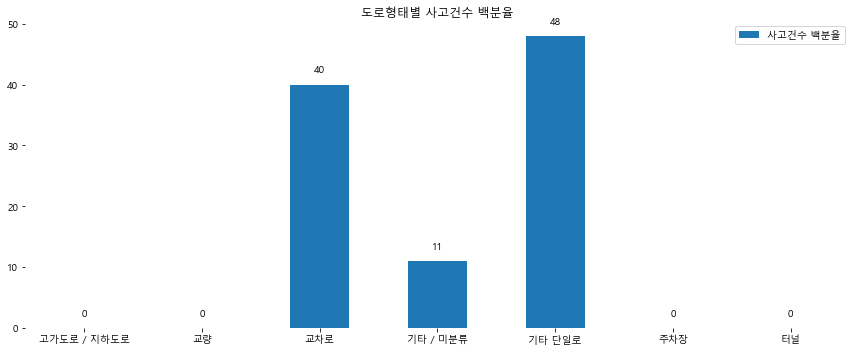

In [141]:
# 도로형태별 사고건수 백분율 그래프로 확인

ax = road_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사고건수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [124]:
# 도로형태별 사망자수 확인하기

dead = accidList.groupby('도로형태')
dead_count = dead.sum()['사망자수']
dead_count

도로형태
고가도로 / 지하도로     1
교량              1
교차로            18
기타 / 미분류        0
기타 단일로         14
주차장             0
터널              0
Name: 사망자수, dtype: int64

In [220]:
dead_count_df = dead_count.to_frame()
dead_count_df.columns = ['사망자수']
dead_count_df

,사망자수
도로형태,
고가도로 / 지하도로,1
교량,1
교차로,18
기타 / 미분류,0
기타 단일로,14
주차장,0
터널,0


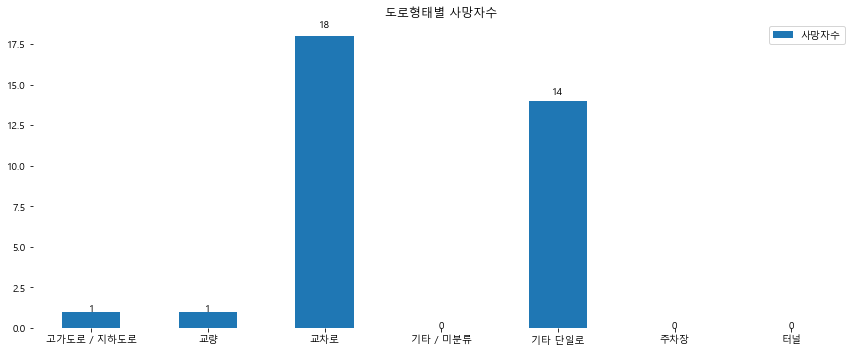

In [221]:
# 도로형태별 사망자수 그래프로 확인하기

ax = dead_count_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사망자수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [126]:
# 도로형태별 사망자수 전부 더하기

dead_total = dead_count.sum()
dead_total

34

In [127]:
# 도로형태별 사고건수 백분율 구하기

dead_percent = (dead_count/dead_total) * 100
dead_percent

도로형태
고가도로 / 지하도로     2.941176
교량              2.941176
교차로            52.941176
기타 / 미분류        0.000000
기타 단일로         41.176471
주차장             0.000000
터널              0.000000
Name: 사망자수, dtype: float64

In [131]:
# 컬럼명 변경

dead_percent_df = dead_percent.to_frame()
dead_percent_df.columns = ['사망자수 백분율']
dead_percent_df

,사망자수 백분율
도로형태,
고가도로 / 지하도로,2.941176
교량,2.941176
교차로,52.941176
기타 / 미분류,0.000000
기타 단일로,41.176471
주차장,0.000000
터널,0.000000


In [132]:
# 도로형태별 사망자수 백분율 데이터 프레임에 '사망자수 백분율' 일의 자리까지 반올림

dead_percent_df['사망자수 백분율'] = dead_percent_df['사망자수 백분율'].round(0)
dead_percent_df

,사망자수 백분율
도로형태,
고가도로 / 지하도로,3.0
교량,3.0
교차로,53.0
기타 / 미분류,0.0
기타 단일로,41.0
주차장,0.0
터널,0.0


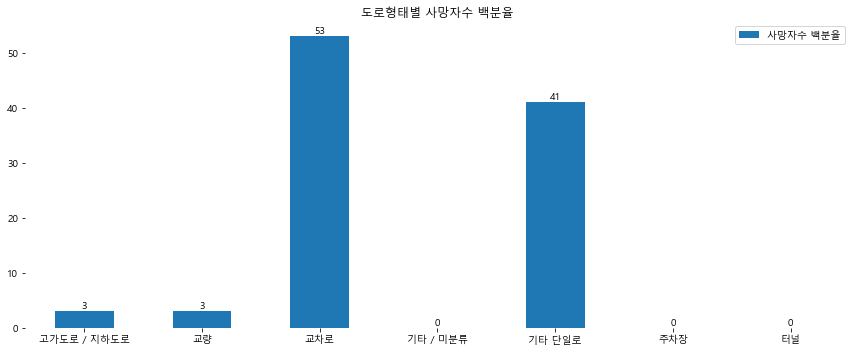

In [161]:
# 도로형태별 사망자수 백분율 그래프로 확인하기

ax = dead_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사망자수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+0.5), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [197]:
seriously_injury = accidList.groupby('도로형태')
seriously_injury_count = seriously_injury.sum()['중상자수']
seriously_injury_count = seriously_injury_count.to_frame()

In [198]:
slightly_injury = accidList.groupby('도로형태')
slightly_injury_count = slightly_injury.sum()['경상자수']
slightly_injury_count = slightly_injury_count.to_frame()

In [199]:
injury = pd.concat([seriously_injury_count, slightly_injury_count], axis=1)
injury

,중상자수,경상자수
도로형태,,
고가도로 / 지하도로,2,10
교량,3,7
교차로,258,634
기타 / 미분류,106,191
기타 단일로,401,834
주차장,2,2
터널,0,2


In [236]:
injury['부상자수'] = injury['중상자수'] + injury['경상자수']
injury

,중상자수,경상자수,부상자수
도로형태,,,
고가도로 / 지하도로,2,10,12
교량,3,7,10
교차로,258,634,892
기타 / 미분류,106,191,297
기타 단일로,401,834,1235
주차장,2,2,4
터널,0,2,2


In [237]:
injury_count = injury['부상자수']
injury_count_df = injury_count.to_frame()
injury_count_df.columns = ['부상자수']
injury_count_df

,부상자수
도로형태,
고가도로 / 지하도로,12
교량,10
교차로,892
기타 / 미분류,297
기타 단일로,1235
주차장,4
터널,2


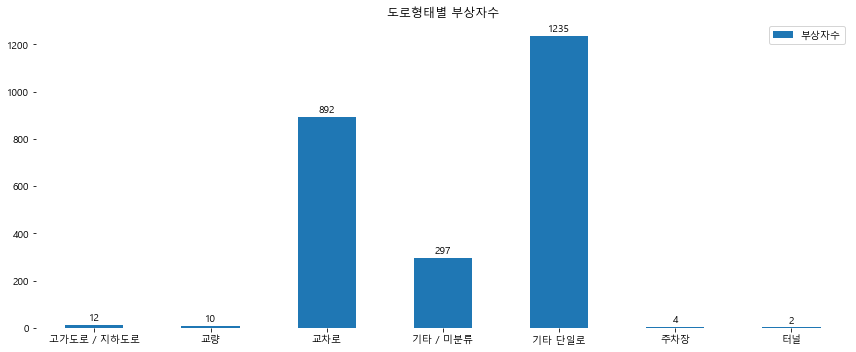

In [238]:
ax = injury_count_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 부상자수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+20), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [211]:
injury_total = injury['부상자수'].sum()
injury_total

2452

In [212]:
injury_percent = (injury['부상자수'] / injury_total) * 100
injury_percent

도로형태
고가도로 / 지하도로     0.489396
교량              0.407830
교차로            36.378467
기타 / 미분류       12.112561
기타 단일로         50.367047
주차장             0.163132
터널              0.081566
Name: 부상자수, dtype: float64

In [225]:
injury_percent = injury_percent.round(0)
injury_percent

도로형태
고가도로 / 지하도로     0.0
교량              0.0
교차로            36.0
기타 / 미분류       12.0
기타 단일로         50.0
주차장             0.0
터널              0.0
Name: 부상자수, dtype: float64

In [226]:
injury_percent_df = injury_percent.to_frame()
injury_percent_df.columns = ['부상자수 백분율']
injury_percent_df

,부상자수 백분율
도로형태,
고가도로 / 지하도로,0.0
교량,0.0
교차로,36.0
기타 / 미분류,12.0
기타 단일로,50.0
주차장,0.0
터널,0.0


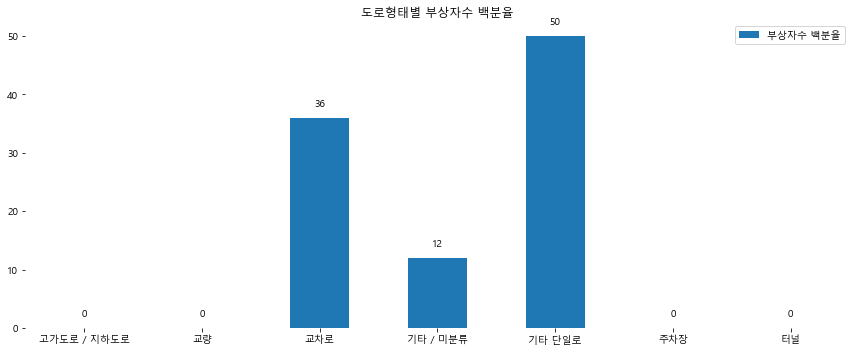

In [228]:
ax = injury_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 부상자수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()